In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Number of units built in each census tract

In [ ]:
total_units = pd.read_csv("./data/bayarea_total_units_JG.csv")
total_units.head(5)

In [ ]:
total_units = total_units.rename(columns={'FIPS13': 'FIPS13', 'YearBuilt': 'year', 'TotalUnits': 'total_units'})

In [ ]:
geoid_10 = total_units['FIPS13'].astype(str)
geoid_10 = geoid_10.str.slice(stop=10)
geoid_10.head(5)

In [ ]:
total_units_geoid = total_units.drop(columns=['FIPS13'])
total_units_geoid['GEO_ID_10'] = geoid_10
total_units_geoid.head(5)

In [ ]:
total_units_geoid['GEO_ID_10'] = total_units_geoid['GEO_ID_10'].str.zfill(11)
total_units_geoid.head(5)

Changed county for census_tract 35511 to 013 (Contra Costa County).

In [ ]:
total_units_geoid.iloc[7, 2] = '0601335511'

In [ ]:
total_units_by_tract_by_year = total_units_geoid.groupby(
        by=['GEO_ID_10','year'], 
        axis=0, 
        as_index=False) \
    .sum()
total_units_by_tract_by_year.head(5)

In [ ]:
total_units_2010_2017 = total_units_by_tract_by_year[
                            (total_units_by_tract_by_year['year'] <= 2017) &
                            (total_units_by_tract_by_year['year'] >= 2010)]
total_units_2010_2017.head(5)

# Converting tracts to zip codes

In [ ]:
tract_to_zip_list = []

for i in range(0, 8):
    year = f'201{i}'
    df = pd.read_excel(f'./data/TRACT_ZIP_12{year}.xlsx')
    df.columns = df.columns.str.lower()
    df['tract'] = df['tract'].astype(str).str.zfill(11)
    df['year'] = int(year)
    df = df.drop(columns=['bus_ratio', 'oth_ratio', 'tot_ratio'])
    df = df.rename(columns={'res_ratio': 'resident'})
    tract_to_zip_list.append(df)

In [ ]:
tract_to_zip = pd.concat(tract_to_zip_list, axis=0)
tract_to_zip.head(5)

In [ ]:
total_units_per_tract = pd.merge(total_units_2010_2017, 
                               tract_to_zip, 
                               left_on=['GEO_ID_10', 'year'], 
                               right_on=['tract', 'year'])
total_units_per_tract.head(5)

In [ ]:
total_units_per_tract['units_built'] = total_units_per_tract['total_units'] * total_units_per_tract['resident']
total_units_per_tract.head(5)

In [ ]:
total_units_per_tract[total_units_per_tract['year'] == 2019].shape

In [ ]:
total_units_per_zip = total_units_per_tract[['year', 'zip', 'units_built']]
total_units_per_zip.head(5)

In [ ]:
total_units_by_zip = total_units_per_zip.groupby(by=['zip', 'year'], axis=0, as_index=False).sum()
total_units_by_zip.head(5)

In [ ]:
total_units_by_zip['units_built'] = total_units_by_zip['units_built'].apply(np.round).astype(int)
total_units_by_zip.head(5)

# Housing Prices

In [2]:
zillow = pd.read_csv('./data/zillow.csv')

In [3]:
zillow.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,227153.0,...,1091641.0,1087154.0,1085121.0,1086397.0,1082450.0,1078831.0,1074640.0,1066881.0,1069011.0,1073214.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,212230.0,...,497724.0,499152.0,501262.0,504040.0,506695.0,509141.0,511452.0,513457.0,515542.0,516747.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,200946.0,...,998619.0,998643.0,1001866.0,1013305.0,1016169.0,1014689.0,1009092.0,1011561.0,1021442.0,1029770.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,201011.0,...,339450.0,340170.0,341602.0,343191.0,345709.0,348800.0,353185.0,357460.0,362468.0,367829.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,283626.0,...,635967.0,637199.0,638751.0,641622.0,644350.0,647291.0,650118.0,652578.0,655761.0,658233.0


In [4]:
zillow = zillow.drop(columns=['RegionID', 
                              'SizeRank', 
                              'RegionType', 
                              'StateName', 
                              'State', 
                              'City', 
                              'Metro', 
                              'CountyName'])
zillow.head(5)

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,10025,227153.0,225738.0,225814.0,225790.0,226306.0,226934.0,226823.0,227619.0,227965.0,...,1091641.0,1087154.0,1085121.0,1086397.0,1082450.0,1078831.0,1074640.0,1066881.0,1069011.0,1073214.0
1,60657,212230.0,212073.0,211661.0,211524.0,210956.0,211141.0,210927.0,211539.0,212435.0,...,497724.0,499152.0,501262.0,504040.0,506695.0,509141.0,511452.0,513457.0,515542.0,516747.0
2,10023,200946.0,200989.0,201100.0,201816.0,202857.0,203710.0,203994.0,204078.0,204399.0,...,998619.0,998643.0,1001866.0,1013305.0,1016169.0,1014689.0,1009092.0,1011561.0,1021442.0,1029770.0
3,77494,201011.0,201259.0,201062.0,199869.0,198728.0,198060.0,198825.0,198512.0,197857.0,...,339450.0,340170.0,341602.0,343191.0,345709.0,348800.0,353185.0,357460.0,362468.0,367829.0
4,60614,283626.0,283367.0,282845.0,282702.0,282021.0,282109.0,281613.0,282177.0,283263.0,...,635967.0,637199.0,638751.0,641622.0,644350.0,647291.0,650118.0,652578.0,655761.0,658233.0


In [5]:
zillow_q4 = zillow[[zillow.columns[0]] + [col for col in zillow.columns if '-12-' in col]]
zillow_q4.head(5)

,RegionName,1996-12-31,1997-12-31,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,...,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31
0,10025,232288.0,249559.0,297409.0,365222.0,457899.0,537778.0,590102.0,706128.0,811054.0,...,917022.0,952211.0,1044071.0,1183382.0,1260988.0,1299640.0,1207579.0,1268144.0,1184383.0,1074640.0
1,60657,216901.0,220413.0,248569.0,282386.0,326790.0,361820.0,382506.0,397071.0,419766.0,...,398085.0,396617.0,450111.0,460604.0,467852.0,491532.0,496357.0,503865.0,491195.0,511452.0
2,10023,206659.0,229875.0,251912.0,279682.0,332722.0,382766.0,424800.0,488220.0,556784.0,...,766144.0,792216.0,873578.0,971943.0,1027807.0,1046132.0,1033575.0,1023463.0,966318.0,1009092.0
3,77494,199658.0,215038.0,207634.0,219026.0,227440.0,228291.0,228549.0,235857.0,247465.0,...,262289.0,269758.0,301976.0,330015.0,340156.0,331932.0,333138.0,337393.0,337232.0,353185.0
4,60614,289462.0,291350.0,325137.0,364159.0,417792.0,456994.0,484111.0,498849.0,525347.0,...,501378.0,503722.0,571893.0,591076.0,611218.0,635666.0,641008.0,650355.0,634193.0,650118.0


In [6]:
zillow_2010_2019 = zillow_q4[[zillow.columns[0]] + 
                             [col for col in zillow_q4.columns if '2010' <= col[:4] < '2020']]
zillow_2010_2019.head(5)

,RegionName,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
0,10025,907964.0,917022.0,952211.0,1044071.0,1183382.0,1260988.0,1299640.0,1207579.0,1268144.0,1184383.0
1,60657,412886.0,398085.0,396617.0,450111.0,460604.0,467852.0,491532.0,496357.0,503865.0,491195.0
2,10023,725539.0,766144.0,792216.0,873578.0,971943.0,1027807.0,1046132.0,1033575.0,1023463.0,966318.0
3,77494,265354.0,262289.0,269758.0,301976.0,330015.0,340156.0,331932.0,333138.0,337393.0,337232.0
4,60614,518787.0,501378.0,503722.0,571893.0,591076.0,611218.0,635666.0,641008.0,650355.0,634193.0


In [7]:
zillow_years = []

for i in range(10):
    year = f'201{i}'
    df = zillow_2010_2019[['RegionName', f'{year}-12-31']]
    df = df.rename(columns={'RegionName': 'zip', f'{year}-12-31': 'price'})
    df['year'] = int(year)
    zillow_years.append(df)

zillow_by_year = pd.concat(zillow_years, axis=0)
zillow_by_year.head(5)

,zip,price,year
0,10025,907964.0,2010
1,60657,412886.0,2010
2,10023,725539.0,2010
3,77494,265354.0,2010
4,60614,518787.0,2010


# Housing Prices with Housing Units built

In [ ]:
data = pd.merge(total_units_by_zip, zillow_by_year, left_on=['zip', 'year'], right_on=['zip', 'year'])
data

In [ ]:
data_2010 = data[data['year'] == 2010]
data_2010.head(5)

In [ ]:
data_2010.to_csv('./data-out/data_2010.csv')

# Housing Units Per Year

In [ ]:
data[['year', 'units_built']].groupby(by=['year']).sum()

In [ ]:
data[data['year'] == 2018].shape

In [ ]:
data[data['year'] == 2010].shape

In [ ]:
zillow_2010_2019

In [8]:
zip_codes = pd.read_csv('./data/bay_area_zip_codes.csv')

In [9]:
zip_codes

,Zip Codes,County,State,Area,City
0,94102,San Francisco County,California,Bay Area,NaN
1,94103,San Francisco County,California,Bay Area,NaN
2,94104,San Francisco County,California,Bay Area,NaN
3,94105,San Francisco County,California,Bay Area,NaN
4,94107,San Francisco County,California,Bay Area,NaN
...,...,...,...,...,...
474,95043,San Benito,California,12-county Combined Statistical Area,NaN
475,95024,San Benito,California,12-county Combined Statistical Area,NaN
476,95023,San Benito,California,12-county Combined Statistical Area,NaN
477,93930,San Benito,California,12-county Combined Statistical Area,NaN


In [10]:
bay_area_zip_codes = list(zip_codes['Zip Codes'])

In [11]:
zillow_bay = zillow_2010_2019[zillow_2010_2019['RegionName'].isin(bay_area_zip_codes)]
zillow_bay = zillow_bay.reset_index().drop(columns=['index'])
zillow_bay.head(5)

,RegionName,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
0,94109,772909.0,747113.0,856997.0,968958.0,1020231.0,1163282.0,1115682.0,1162264.0,1194078.0,1221178.0
1,94565,283287.0,300174.0,354926.0,428580.0,475806.0,491285.0,525957.0,564190.0,590716.0,587064.0
2,94501,507998.0,486283.0,548960.0,680398.0,721427.0,823707.0,877386.0,973741.0,1045963.0,1077779.0
3,94110,830192.0,808865.0,925853.0,1105195.0,1278243.0,1438728.0,1437001.0,1510650.0,1610837.0,1631369.0
4,94558,422762.0,369419.0,423200.0,526375.0,554726.0,605605.0,649830.0,667422.0,710722.0,700421.0


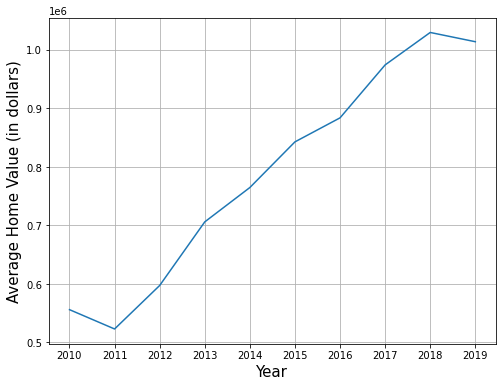

In [40]:
xlabels = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
avg_bay_price = list(zillow_bay.iloc[:, 1:].mean(axis=0))

plt.figure(figsize=(8, 6))
plt.plot(avg_bay_price)
plt.xticks(np.arange(len(xlabels)), xlabels)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Home Value (in dollars)", fontsize=15)
plt.grid()
plt.savefig('./out/images/bay_area_housing.png', dpi=800)
plt.show();

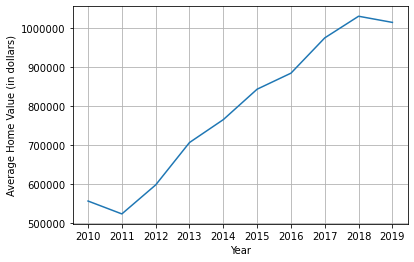

In [55]:
fig, ax = plt.subplots()
ax.plot(avg_bay_price)
ax.ticklabel_format(style='plain') #This is the line you need <-------
plt.xticks(np.arange(len(xlabels)), xlabels)
plt.xlabel("Year")
plt.ylabel("Average Home Value (in dollars)")
plt.grid()
fig.savefig('./out/images/bay_area_housing.png', dpi=300)
fig.show()